# Association Rule - Apriori 

Training association rule models (Apriori) to find the most frequent conditions in which police have shot the people dead.

This algorithm associate various conditions of the person who was shot. Most frequent conditions can be used to analyze if their is racism in the shootings which is a heated topic of discussion at present .

<b> Importing the Dataset</b>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data Loading
dataset = pd.read_csv(r'C:\Users\abc\Desktop\apriori project\us police shootings.csv')

<b> Pre-processing of Dataset</b>

Dropping the columns 'name', 'date', 'body_camera', 'signs_of_mental_illness', 'city' and 'state' as values of name and date were not frequent and columns like 'body_camera', 'signs_of_mental_illness', 'city' and 'state' were not required according to the objective of my project. 

In [3]:
data=dataset.drop(columns=['name','date','body_camera','signs_of_mental_illness','city','state'])

In [4]:
data.head(20)

,manner_of_death,armed,age,gender,race,threat_level,flee,arms_category
0,shot,gun,53.0,M,Asian,attack,Not fleeing,Guns
1,shot,gun,47.0,M,White,attack,Not fleeing,Guns
2,shot and Tasered,unarmed,23.0,M,Hispanic,other,Not fleeing,Unarmed
3,shot,toy weapon,32.0,M,White,attack,Not fleeing,Other unusual objects
4,shot,nail gun,39.0,M,Hispanic,attack,Not fleeing,Piercing objects
5,shot,gun,18.0,M,White,attack,Not fleeing,Guns
6,shot,gun,22.0,M,Hispanic,attack,Car,Guns
7,shot,gun,35.0,M,White,attack,Not fleeing,Guns
8,shot,unarmed,34.0,F,White,other,Not fleeing,Unarmed
9,shot,toy weapon,47.0,M,Black,attack,Not fleeing,Other unusual objects


Checking for missing values:

In [5]:
data.isnull().values.any()

False

### Apriori implementation using apyori library 

The output of this part is to see which factors contribute most when police shots someone using apriori algorithm.

We will put some transformations to fit on dataframes and to make the visualization easier.

In [6]:
# Adding all incidents into a list of lists
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, 8)])

In [7]:
# Inspecting elements
transactions[:3]

[['shot', 'gun', '53.0', 'M', 'Asian', 'attack', 'Not fleeing', 'Guns'],
 ['shot', 'gun', '47.0', 'M', 'White', 'attack', 'Not fleeing', 'Guns'],
 ['shot and Tasered',
  'unarmed',
  '23.0',
  'M',
  'Hispanic',
  'other',
  'Not fleeing',
  'Unarmed']]

In [8]:
# Training Apriori on the dataset
# The hyperparameters choosen on this training are:
# min_length: we want at least 3 items to be associated. No point in having a single or two items in the result

from apyori import apriori
rules = apriori(transactions, min_support = 0.05, min_confidence = 0.6, min_lift = 3, min_length = 3)

In [9]:
# Visualising the results
results = list(rules)

In [10]:
len(results)

33

In [11]:
results

[RelationRecord(items=frozenset({'Sharp objects', 'knife'}), support=0.14463738508682328, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Sharp objects'}), items_add=frozenset({'knife'}), confidence=0.8655256723716381, lift=5.984107579462103), OrderedStatistic(items_base=frozenset({'knife'}), items_add=frozenset({'Sharp objects'}), confidence=1.0, lift=5.984107579462103)]),
 RelationRecord(items=frozenset({'unarmed', 'Unarmed'}), support=0.0710929519918284, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Unarmed'}), items_add=frozenset({'unarmed'}), confidence=1.0, lift=14.066091954022989), OrderedStatistic(items_base=frozenset({'unarmed'}), items_add=frozenset({'Unarmed'}), confidence=1.0, lift=14.066091954022989)]),
 RelationRecord(items=frozenset({'unknown', 'Unknown'}), support=0.0853932584269663, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Unknown'}), items_add=frozenset({'unknown'}), confidence=1.0, lift=11.710526315789473), OrderedStatisti

In [12]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

### Visualizing results in a dataframe

In [13]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [14]:
# Show top 20 higher lift scores
rank.sort_values('Lift', ascending=False).head(20)

,Association,Lift
18,"[shot, unarmed, M, Unarmed]",14.0661
11,"[shot, unarmed, Unarmed]",14.0661
4,"[unarmed, M, Unarmed]",14.0661
1,"[unarmed, Unarmed]",14.0661
5,"[unknown, M, Unknown]",11.7105
19,"[unknown, M, Unknown, shot]",11.7105
2,"[unknown, Unknown]",11.7105
12,"[unknown, Unknown, shot]",11.7105
30,"[Sharp objects, White, knife, Not fleeing, shot]",6.17132
15,"[Sharp objects, knife, M, attack]",6.15471


By the study, police does not seem to target any particular community therefore showing no sign of racism. Many people shot were unarmed or very few of the suspects had any kind of sharp objects like a knife.

# Clustering

Reading the data

In [15]:
dataset

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,02-01-2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,02-01-2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,03-01-2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,04-01-2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,04-01-2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,12-06-2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,12-06-2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,13-06-2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,13-06-2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


# Data Pre-processing

Checking For Null Values

In [16]:
dataset.isnull().values.any()

False

In [17]:
x=dataset.iloc[:,[2,6]]

In [18]:
x

,manner_of_death,race
0,shot,Asian
1,shot,White
2,shot and Tasered,Hispanic
3,shot,White
4,shot,Hispanic
...,...,...
4890,shot,Black
4891,shot,Black
4892,shot,White
4893,shot,White


Encoding columns "manner_of_death" and "race"

In [19]:
# Encoding categorical data ie converting categorical to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
x.iloc[:, 0] = labelencoder_X.fit_transform(x.iloc[:, 0]) 

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1046: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [20]:
# Encoding categorical data ie converting categorical to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
x.iloc[:, 1] = labelencoder_X.fit_transform(x.iloc[:, 1]) 

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Encoded Data:

In [21]:
x

,manner_of_death,race
0,0,0
1,0,5
2,1,2
3,0,5
4,0,2
...,...,...
4890,0,1
4891,0,1
4892,0,5
4893,0,5


Scaling of Data:

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(x)

In [23]:
data_scaled

array([[-0.23101464, -1.76595867],
       [-0.23101464,  0.95102891],
       [ 4.32872998, -0.67916364],
       ...,
       [-0.23101464,  0.95102891],
       [-0.23101464,  0.95102891],
       [-0.23101464,  0.95102891]])

# K-Means Clustering

Elbow method:

In [24]:
#Running K means in range of k 
from sklearn.cluster import KMeans
Percentage_of_variance = []
var = range(1,10)
for variable in var:
    kmod = KMeans(n_clusters=variable)
    kmod.fit(data_scaled)
    Percentage_of_variance.append(kmod.inertia_)

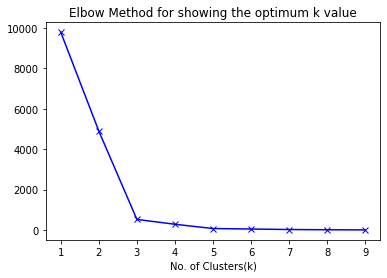

In [25]:
# Elbow of K-Means
plt.plot(var, Percentage_of_variance, 'bx-')
plt.xlabel('No. of Clusters(k)')
plt.title('Elbow Method for showing the optimum k value')
plt.show()

As we are getting elbow at K=3 therefore number of clusters are choosen to be 3

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)

In [27]:
y_kmeans = kmeans.fit_predict(data_scaled)

In [28]:
dataset['kmeans_cluster'] =y_kmeans

In [29]:
dataset

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,kmeans_cluster
0,Tim Elliot,02-01-2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1
1,Lewis Lee Lembke,02-01-2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,0
2,John Paul Quintero,03-01-2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2
3,Matthew Hoffman,04-01-2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,0
4,Michael Rodriguez,04-01-2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,12-06-2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,1
4891,Caine Van Pelt,12-06-2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,1
4892,Hannah Fizer,13-06-2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,0
4893,William Slyter,13-06-2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,0


In [30]:
print(kmeans.cluster_centers_)

[[-0.23101464  0.9413052 ]
 [-0.23101464 -0.99929355]
 [ 4.32872998 -0.07879703]]


In [31]:
print(kmeans.labels_)

[1 0 2 ... 0 0 0]


In [32]:
pd.Series(kmeans.labels_).value_counts()

0    2403
1    2244
2     248
dtype: int64

In [33]:
dataset.groupby('kmeans_cluster').mean()

,age,signs_of_mental_illness,body_camera
kmeans_cluster,,,
0,39.863092,0.283812,0.093217
1,33.026141,0.151961,0.141711
2,36.328039,0.322581,0.145161


<Figure size 3600x3600 with 0 Axes>

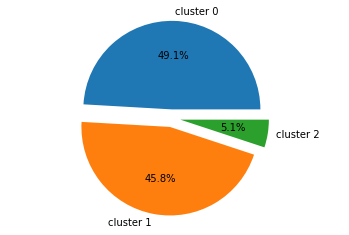

In [34]:
import matplotlib.pyplot as plt
size=pd.Series(kmeans.labels_).value_counts()
plt.figure(figsize=(50,50))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 0','cluster 1','cluster 2'
sizes = size
explode = (0.1, 0.1, 0.1)  #  "explode" all three sides so that pie charts looks better
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

1. cluster 0 consists of 49.1% of data 
2. cluster 1 consists of 45.8% of data 
3. cluster 2 consists of 5.1% of data  

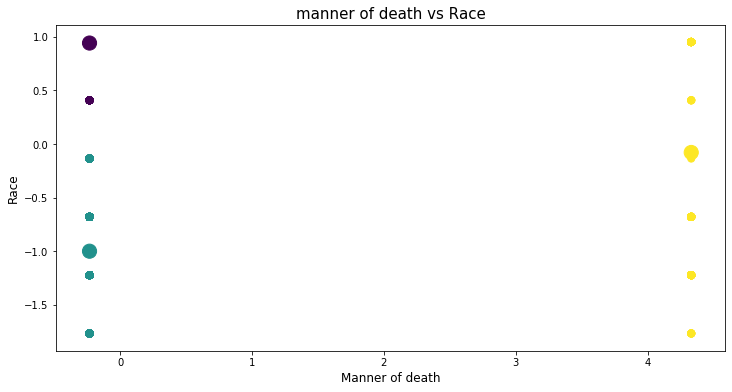

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=(200,200), c=[0,1,2]) 
plt.scatter(data_scaled[:,0],data_scaled[:,1],s=(50,50), c=kmeans.labels_) 
plt.title("manner of death vs Race", fontsize=15)
plt.xlabel("Manner of death", fontsize=12)
plt.ylabel("Race", fontsize=12)
plt.show()

<b>Since all three clusters contains all races therefore both Apriori and k-means clustering algorithm verified that that was no racism
shown by US police. Which means that the US police is not targeting any particular community.</b>